In [988]:
import pandas as pd
data = pd.read_csv("C:\\Users\\35988\\Downloads\\qnmj55jovjm7w33g.csv")
data.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,optionid,index_flag,issuer,exercise_style
0,1996-01-04,1996-03-16,C,625000,9.1250,9.875,463,10177785,1,CBOE S&P 500 INDEX,E
1,1996-01-04,1996-03-16,C,580000,41.5000,42.500,136,10194353,1,CBOE S&P 500 INDEX,E
2,1996-01-04,1996-03-16,P,530000,0.4375,0.625,250,10146564,1,CBOE S&P 500 INDEX,E
3,1996-01-04,1996-02-17,P,625000,12.2500,13.000,1342,10055271,1,CBOE S&P 500 INDEX,E
4,1996-01-04,1996-03-16,P,525000,0.5000,0.625,100,10170877,1,CBOE S&P 500 INDEX,E


In [989]:
#Cleaning up the dataframe using only contracts that expire before the 27th of each month

data['date'] = pd.to_datetime(data['date'])
data['exdate'] = pd.to_datetime(data['exdate'])
data = data[data['exdate'].dt.day<27]
data = data[data['date'].dt.year>2010]


In [990]:
def naive_strat(data):
    data = data[data['cp_flag']=='C']

    #data with index idx is the dataframe where we only consider the largest strikes for each trading date

    idx = data.groupby(['date','exdate'])['strike_price'].transform(max)==data['strike_price']
    data_idx = data[idx]

    #bid_series is the mean of the cross-section of the optin prices for each tradin date - 3 month moving avearge is self explanatory

    bid_series = data_idx.groupby('date')['best_bid'].mean()
    three_month_moving_avg = bid_series.rolling('90D').mean()

    return plt.plot(three_month_moving_avg)


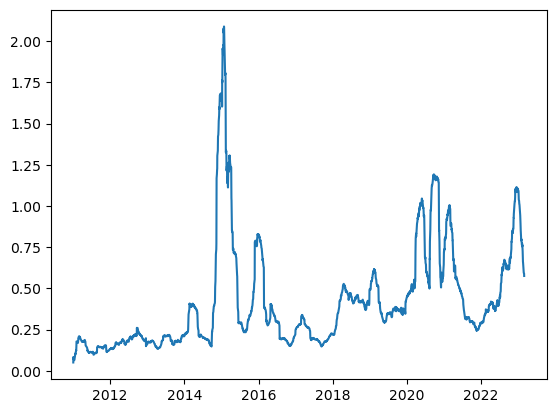

In [991]:
import matplotlib.pyplot as plt
naive_strat(data)

In [992]:
idx = data.groupby(['date','exdate','cp_flag'])['strike_price'].transform('min')==data['strike_price']
data_idx = data[idx]


In [993]:
idx1 = data.groupby(['date','exdate','cp_flag'])['strike_price'].transform('max')==data['strike_price']
data_idx1 = data[idx1]


In [994]:

data_c_min = data_idx[data_idx['cp_flag']=='C']
data_c_max = data_idx1[data_idx1['cp_flag']=='C']
data_p_min = data_idx[data_idx['cp_flag']=='P']
data_p_max = data_idx1[data_idx1['cp_flag']=='P']


In [995]:
data_idx1[data_idx1['cp_flag']=='P']

,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,optionid,index_flag,issuer,exercise_style
546913,2011-01-03,2011-01-22,P,1400000,127.5,130.6,7,36111753,1,CBOE S&P 500 INDEX,E
547008,2011-01-03,2011-02-19,P,1350000,82.2,85.2,1,49287073,1,CBOE S&P 500 INDEX,E
547070,2011-01-03,2011-03-19,P,1400000,132.6,135.9,2000,35502599,1,CBOE S&P 500 INDEX,E
547178,2011-01-04,2011-01-22,P,1355000,84.5,88.3,1,46992191,1,CBOE S&P 500 INDEX,E
547269,2011-01-04,2011-02-19,P,1345000,78.9,82.7,2,49586363,1,CBOE S&P 500 INDEX,E
...,...,...,...,...,...,...,...,...,...,...,...
6562621,2023-02-28,2023-03-23,P,4075000,121.4,130.0,15,152800468,1,CBOE S&P 500 INDEX,E
6562833,2023-02-28,2023-03-24,P,4200000,218.6,223.8,4,152365189,1,CBOE S&P 500 INDEX,E
6563488,2023-02-28,2023-04-06,P,4090000,140.2,144.8,1,152917937,1,CBOE S&P 500 INDEX,E
6563642,2023-02-28,2023-04-14,P,4100000,155.0,157.5,5,152489151,1,CBOE S&P 500 INDEX,E


In [996]:
data_idx

,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,optionid,index_flag,issuer,exercise_style
546799,2011-01-03,2011-01-22,C,1125000,144.90,148.10,1022,36111690,1,CBOE S&P 500 INDEX,E
546914,2011-01-03,2011-01-22,P,950000,0.05,0.10,230,36111787,1,CBOE S&P 500 INDEX,E
546957,2011-01-03,2011-02-19,C,950000,317.20,321.00,30,36257632,1,CBOE S&P 500 INDEX,E
547009,2011-01-03,2011-02-19,P,800000,0.05,0.15,35,49586145,1,CBOE S&P 500 INDEX,E
547020,2011-01-03,2011-03-19,C,1125000,149.10,152.10,19,45671347,1,CBOE S&P 500 INDEX,E
...,...,...,...,...,...,...,...,...,...,...,...
6563489,2023-02-28,2023-04-14,C,3800000,235.20,237.80,2,152489038,1,CBOE S&P 500 INDEX,E
6563549,2023-02-28,2023-04-14,P,1800000,0.15,0.25,10,152489097,1,CBOE S&P 500 INDEX,E
6563756,2023-02-28,2023-04-21,P,1800000,0.20,0.30,1,150935101,1,CBOE S&P 500 INDEX,E
6564115,2023-02-28,2023-05-05,C,3770000,280.50,290.80,2,152903848,1,CBOE S&P 500 INDEX,E


In [997]:
data_p_max = data_p_max[['date','exdate', 'strike_price']]
data_c_max = data_c_max[['date','exdate', 'strike_price']]
data_p_min = data_p_min[['date','exdate', 'strike_price']]
data_c_min = data_c_min[['date','exdate', 'strike_price']]

In [998]:
data_p_max.set_index('date', inplace=True)
data_c_max.set_index('date', inplace=True)
data_p_min.set_index('date', inplace=True)
data_c_min.set_index('date', inplace=True)

In [999]:
data_p = data[data['cp_flag']=='P']
data_c = data[data['cp_flag']=='C']

In [1000]:
data_p_c_min = pd.merge(data_p,data_c_min, on=['date','exdate','strike_price'], how='inner')
data_p_p_min = pd.merge(data_p,data_p_min, on=['date','exdate','strike_price'], how='inner')
data_p_p_max = pd.merge(data_p,data_p_max, on=['date','exdate','strike_price'], how='inner')
data_c_c_min = pd.merge(data_c,data_c_min, on=['date','exdate','strike_price'], how='inner')
data_c_c_max = pd.merge(data_c,data_c_max, on=['date','exdate','strike_price'], how='inner')
data_c_p_max = pd.merge(data_c,data_p_max, on=['date','exdate','strike_price'], how='inner')

In [1001]:
data_c_p_max

,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,optionid,index_flag,issuer,exercise_style
0,2011-01-03,2011-02-19,C,1350000,2.15,3.40,2385,36257597,1,CBOE S&P 500 INDEX,E
1,2011-01-03,2011-03-19,C,1400000,1.30,2.40,385,45487328,1,CBOE S&P 500 INDEX,E
2,2011-01-04,2011-01-22,C,1355000,0.15,0.25,10,49286766,1,CBOE S&P 500 INDEX,E
3,2011-01-04,2011-02-19,C,1345000,2.20,3.40,1,49586362,1,CBOE S&P 500 INDEX,E
4,2011-01-04,2011-03-19,C,1290000,22.50,26.50,1,49287364,1,CBOE S&P 500 INDEX,E
...,...,...,...,...,...,...,...,...,...,...,...
25873,2023-02-28,2023-03-21,C,4200000,4.30,4.50,49,152711545,1,CBOE S&P 500 INDEX,E
25874,2023-02-28,2023-03-23,C,4075000,35.80,36.80,7,152800400,1,CBOE S&P 500 INDEX,E
25875,2023-02-28,2023-03-24,C,4200000,7.90,8.10,177,152365109,1,CBOE S&P 500 INDEX,E
25876,2023-02-28,2023-04-14,C,4100000,51.10,51.70,6,152489070,1,CBOE S&P 500 INDEX,E


In [1002]:
data_p_c_min

,date,exdate,cp_flag,strike_price,best_bid,best_offer,volume,optionid,index_flag,issuer,exercise_style
0,2011-01-03,2011-01-22,P,1125000,0.55,0.65,724,49585967,1,CBOE S&P 500 INDEX,E
1,2011-01-03,2011-02-19,P,950000,0.10,0.50,100,49586205,1,CBOE S&P 500 INDEX,E
2,2011-01-03,2011-03-19,P,1125000,7.10,8.90,2163,46239430,1,CBOE S&P 500 INDEX,E
3,2011-01-04,2011-03-19,P,1160000,11.10,12.80,1,46989347,1,CBOE S&P 500 INDEX,E
4,2011-01-05,2011-01-22,P,1030000,0.10,0.15,1003,49286637,1,CBOE S&P 500 INDEX,E
...,...,...,...,...,...,...,...,...,...,...,...
22973,2023-02-28,2023-03-22,P,3725000,12.50,12.80,5,152859340,1,CBOE S&P 500 INDEX,E
22974,2023-02-28,2023-03-23,P,3650000,7.80,8.00,1,152800439,1,CBOE S&P 500 INDEX,E
22975,2023-02-28,2023-03-24,P,3200000,1.05,1.15,2,152365130,1,CBOE S&P 500 INDEX,E
22976,2023-02-28,2023-04-06,P,3800000,35.20,35.80,16,152859626,1,CBOE S&P 500 INDEX,E


In [1003]:
L1

,exdate,cp_flag_x,strike_price_x,best_bid_x,best_offer_x,volume_x,optionid_x,index_flag_x,issuer_x,exercise_style_x,...,volume,optionid,index_flag,issuer,exercise_style,L1,Close,annualized,diff,L11
1996-01-04,1996-03-16,P,500000,0.2500,0.5000,500,10539629,1,CBOE S&P 500 INDEX,E,...,45,10763640,1,CBOE S&P 500 INDEX,E,-118.8750,617.700012,0.0503,72,3.761068
1996-01-04,1996-01-20,P,560000,0.1875,0.3125,100,10975929,1,CBOE S&P 500 INDEX,E,...,10,10967275,1,CBOE S&P 500 INDEX,E,-56.4375,617.700012,0.0503,16,2.495786
1996-01-04,1996-02-17,P,595000,3.1250,3.6250,1114,10980129,1,CBOE S&P 500 INDEX,E,...,3,10705713,1,CBOE S&P 500 INDEX,E,-22.7500,617.700012,0.0503,44,3.546544
1996-01-05,1996-01-20,P,525000,0.0625,0.1250,100,10177366,1,CBOE S&P 500 INDEX,E,...,200,10206430,1,CBOE S&P 500 INDEX,E,-91.2500,616.710022,0.0504,15,1.546181
1996-01-05,1996-02-17,P,550000,0.5000,0.6250,200,10585059,1,CBOE S&P 500 INDEX,E,...,1,11297248,1,CBOE S&P 500 INDEX,E,-68.3125,616.710022,0.0504,43,1.653153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28,2023-03-22,P,3725000,12.5000,12.8000,5,152859340,1,CBOE S&P 500 INDEX,E,...,4,152859301,1,CBOE S&P 500 INDEX,E,-261.4000,3970.149902,0.0471,22,-5.691270
2023-02-28,2023-03-23,P,3650000,7.8000,8.0000,1,152800439,1,CBOE S&P 500 INDEX,E,...,2,152800371,1,CBOE S&P 500 INDEX,E,-340.5000,3970.149902,0.0471,23,-9.534277
2023-02-28,2023-03-24,P,3200000,1.0500,1.1500,2,152365130,1,CBOE S&P 500 INDEX,E,...,2,152365050,1,CBOE S&P 500 INDEX,E,-786.1000,3970.149902,0.0471,24,-6.056096
2023-02-28,2023-04-06,P,3800000,35.2000,35.8000,16,152859626,1,CBOE S&P 500 INDEX,E,...,4,152859559,1,CBOE S&P 500 INDEX,E,-193.1000,3970.149902,0.0471,37,-4.852035


In [1004]:
L1 = pd.merge(data_p_c_min,data_p_p_min, on=['date','exdate'], how='inner')
L1 = pd.merge(L1,data_c_c_min, on=['date','exdate'], how='inner' )
L1['L1'] = L1['best_offer_x'] - L1['best_offer_y'] - L1['best_offer']


In [1005]:
L2 = pd.merge(data_p_p_max,data_p_p_min, on=['date','exdate'], how='inner')
L2 = pd.merge(L2,data_c_p_max, on=['date','exdate'], how='inner' )
L2['L2'] = L2['best_offer_x'] - L2['best_offer_y'] - L2['best_offer']

In [1006]:
U1 = pd.merge(data_p_c_min,data_c_c_max, on=['date','exdate'], how='inner')
U1 = pd.merge(U1,data_c_c_min, on=['date','exdate'], how='inner' )
U1['U1'] = U1['best_offer_x'] + U1['best_offer_y'] - U1['best_offer']

In [1007]:
U2 = pd.merge(data_p_p_max,data_c_c_max, on=['date','exdate'], how='inner')
U2 = pd.merge(U2,data_c_p_max, on=['date','exdate'], how='inner' )
U2['U2'] = U2['best_offer_x'] + U2['best_offer_y'] - U2['best_offer']

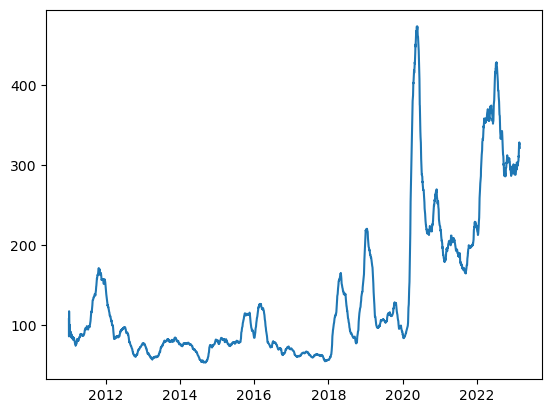

In [1008]:
bid_series = L2.groupby('date')['L2'].mean()
three_month_moving_avgL1 = bid_series.rolling('90D').mean()
plt.plot(three_month_moving_avgL1)

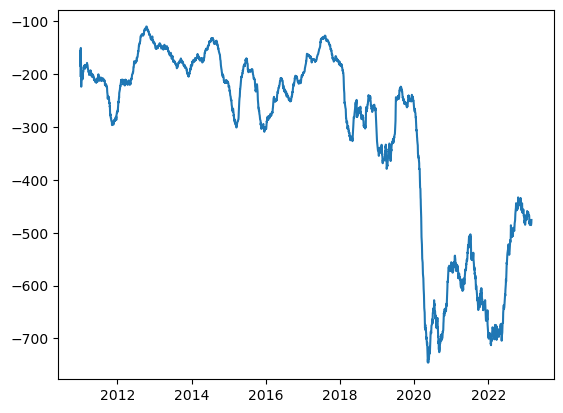

In [1009]:
bid_seriesU1 = U1.groupby('date')['U1'].mean()
three_month_moving_avg = bid_seriesU1.rolling('90D').mean()
plt.plot(three_month_moving_avg)


In [1010]:
import yfinance as yf

# Define the ticker symbol for the S&P 500 index
ticker_symbol = '^GSPC'

# Define the start date
start_date = '1996-01-01'

# Download historical data
sp500_data = yf.download(ticker_symbol, start=start_date)



[*********************100%%**********************]  1 of 1 completed


Date
1996-01-02     620.729980
1996-01-03     621.320007
1996-01-04     617.700012
1996-01-05     616.710022
1996-01-08     618.460022
                 ...     
2024-03-15    5117.089844
2024-03-18    5149.419922
2024-03-19    5178.509766
2024-03-20    5224.620117
2024-03-21    5241.529785
Name: Close, Length: 7104, dtype: float64

In [ ]:



# de-annualize yearly interest rates
def deannualize(annual_rate, periods=365):
    return (1 + annual_rate) ** (1 / periods) - 1


def get_risk_free_rate():
    # download 3-month us treasury bills rates
    annualized = yf.download("^IRX")["Adj Close"]

    # de-annualize
    daily = annualized.apply(deannualize)
    rf = pd.DataFrame({"annualized": annualized, "daily": daily})

    # create dataframe
    return rf


rf = get_risk_free_rate()
rf
risk_free = rf['annualized'] / 100

In [1011]:
sp500 = sp500_data['Close']
sp500



Date
1996-01-02     620.729980
1996-01-03     621.320007
1996-01-04     617.700012
1996-01-05     616.710022
1996-01-08     618.460022
                 ...     
2024-03-15    5117.089844
2024-03-18    5149.419922
2024-03-19    5178.509766
2024-03-20    5224.620117
2024-03-21    5241.529785
Name: Close, Length: 7104, dtype: float64

In [1012]:
risk_free

Date
1960-01-04    0.04520
1960-01-05    0.04550
1960-01-06    0.04680
1960-01-07    0.04630
1960-01-08    0.04590
               ...   
2024-03-14    0.05238
2024-03-15    0.05238
2024-03-18    0.05238
2024-03-19    0.05238
2024-03-20    0.05228
Name: annualized, Length: 16066, dtype: float64

In [1013]:
U1.set_index('date', inplace=True)


In [1014]:
U1 = pd.merge(U1, sp500, left_index=True, right_index=True)


In [1015]:
U1 = pd.merge(U1, risk_free, left_index=True, right_index=True)

In [1016]:
U1[['U1','strike_price','Close','annualized']]

,U1,strike_price,Close,annualized
2011-01-03,-146.75,1125000,1271.869995,0.00120
2011-01-03,-320.40,950000,1271.869995,0.00120
2011-01-03,-142.20,1125000,1271.869995,0.00120
2011-01-04,-105.20,1160000,1270.199951,0.00135
2011-01-05,-247.45,1030000,1276.560059,0.00135
...,...,...,...,...
2023-02-28,-260.70,3725000,3970.149902,0.04710
2023-02-28,-339.00,3650000,3970.149902,0.04710
2023-02-28,-785.70,3200000,3970.149902,0.04710
2023-02-28,-192.70,3800000,3970.149902,0.04710


In [1017]:
U1['diff'] = (U1.exdate - U1.index).dt.days

In [1018]:
U1['U11']= U1['Close'] - (U1['strike_price']/1000)*2.718**(-U1['annualized']*U1['diff']/365) + U1['U1']


In [1019]:
L1.set_index('date', inplace=True)

L1 = pd.merge(L1, sp500, left_index=True, right_index=True)

L1 = pd.merge(L1, risk_free, left_index=True, right_index=True)
L1[['L1', 'strike_price', 'Close', 'annualized']]
L1['diff'] = (L1.exdate - L1.index).dt.days
L1['L11'] = L1['Close'] - (L1['strike_price_x'] / 1000) * 2.718 ** (-L1['annualized'] * L1['diff'] / 365) + L1['L1']

In [1020]:
L1

,exdate,cp_flag_x,strike_price_x,best_bid_x,best_offer_x,volume_x,optionid_x,index_flag_x,issuer_x,exercise_style_x,...,volume,optionid,index_flag,issuer,exercise_style,L1,Close,annualized,diff,L11
2011-01-03,2011-01-22,P,1125000,0.55,0.65,724,49585967,1,CBOE S&P 500 INDEX,E,...,1022,36111690,1,CBOE S&P 500 INDEX,E,-147.55,1271.869995,0.00120,19,-0.609740
2011-01-03,2011-02-19,P,950000,0.10,0.50,100,49586205,1,CBOE S&P 500 INDEX,E,...,30,36257632,1,CBOE S&P 500 INDEX,E,-320.65,1271.869995,0.00120,47,1.366763
2011-01-03,2011-03-19,P,1125000,7.10,8.90,2163,46239430,1,CBOE S&P 500 INDEX,E,...,19,45671347,1,CBOE S&P 500 INDEX,E,-143.35,1271.869995,0.00120,75,3.797329
2011-01-04,2011-03-19,P,1160000,11.10,12.80,1,46989347,1,CBOE S&P 500 INDEX,E,...,5,46989331,1,CBOE S&P 500 INDEX,E,-105.75,1270.199951,0.00135,74,4.767365
2011-01-05,2011-01-22,P,1030000,0.10,0.15,1003,49286637,1,CBOE S&P 500 INDEX,E,...,2000,36274105,1,CBOE S&P 500 INDEX,E,-247.65,1276.560059,0.00135,17,-1.025187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28,2023-03-22,P,3725000,12.50,12.80,5,152859340,1,CBOE S&P 500 INDEX,E,...,4,152859301,1,CBOE S&P 500 INDEX,E,-261.40,3970.149902,0.04710,22,-5.691270
2023-02-28,2023-03-23,P,3650000,7.80,8.00,1,152800439,1,CBOE S&P 500 INDEX,E,...,2,152800371,1,CBOE S&P 500 INDEX,E,-340.50,3970.149902,0.04710,23,-9.534277
2023-02-28,2023-03-24,P,3200000,1.05,1.15,2,152365130,1,CBOE S&P 500 INDEX,E,...,2,152365050,1,CBOE S&P 500 INDEX,E,-786.10,3970.149902,0.04710,24,-6.056096
2023-02-28,2023-04-06,P,3800000,35.20,35.80,16,152859626,1,CBOE S&P 500 INDEX,E,...,4,152859559,1,CBOE S&P 500 INDEX,E,-193.10,3970.149902,0.04710,37,-4.852035


In [1021]:
L2.set_index('date', inplace=True)

L2 = pd.merge(L2, sp500, left_index=True, right_index=True)

L2 = pd.merge(L2, risk_free, left_index=True, right_index=True)
L2[['L2', 'strike_price', 'Close', 'annualized']]
L2['diff'] = (L2.exdate - L2.index).dt.days
L2['L22'] = L2['Close'] - (L2['strike_price_x'] / 1000) * 2.718 ** (-L2['annualized'] * L2['diff'] / 365) + L2['L2']

In [1022]:
U2.set_index('date', inplace=True)

U2 = pd.merge(U2, sp500, left_index=True, right_index=True)

U2 = pd.merge(U2, risk_free, left_index=True, right_index=True)
U2[['U2', 'strike_price', 'Close', 'annualized']]
U2['diff'] = (U2.exdate - U2.index).dt.days
U2['U22'] = U2['Close'] - (U2['strike_price_x'] / 1000) * 2.718 ** (-U2['annualized'] * U2['diff'] / 365) + U2['U2']

In [1023]:
bid_seriesU1 = U1.groupby(level=0)['U11'].mean()
three_month_moving_avgU1 = bid_seriesU1.rolling('90D').mean()
bid_seriesL1 = L1.groupby(level=0)['L11'].mean()
three_month_moving_avgL1 = bid_seriesL1.rolling('90D').mean()
bid_seriesU2 = U2.groupby(level=0)['U22'].mean()
three_month_moving_avgU2 = bid_seriesU2.rolling('90D').mean()
bid_seriesL2 = L2.groupby(level=0)['L22'].mean()
three_month_moving_avgL2 = bid_seriesL2.rolling('90D').mean()

In [1034]:
data_supreme['cp_flag'].value_counts(normalize=True)*100
#lower = 0.5*three_month_moving_avgL1+0.5*three_month_moving_avgL2

P    50.013804
C    49.986196
Name: cp_flag, dtype: float64

In [1035]:
U2

,exdate,cp_flag_x,strike_price_x,best_bid_x,best_offer_x,volume_x,optionid_x,index_flag_x,issuer_x,exercise_style_x,...,volume,optionid,index_flag,issuer,exercise_style,U2,Close,annualized,diff,U22
2011-01-03,2011-02-19,P,1350000,82.2,85.2,1,49287073,1,CBOE S&P 500 INDEX,E,...,2385,36257597,1,CBOE S&P 500 INDEX,E,81.90,1271.869995,0.00120,47,3.978560
2011-01-03,2011-03-19,P,1400000,132.6,135.9,2000,35502599,1,CBOE S&P 500 INDEX,E,...,385,45487328,1,CBOE S&P 500 INDEX,E,134.50,1271.869995,0.00120,75,6.715122
2011-01-04,2011-01-22,P,1355000,84.5,88.3,1,46992191,1,CBOE S&P 500 INDEX,E,...,10,49286766,1,CBOE S&P 500 INDEX,E,88.20,1270.199951,0.00135,18,3.490148
2011-01-04,2011-02-19,P,1345000,78.9,82.7,2,49586363,1,CBOE S&P 500 INDEX,E,...,1,49586362,1,CBOE S&P 500 INDEX,E,80.25,1270.199951,0.00135,46,5.678742
2011-01-04,2011-03-19,P,1290000,48.6,52.4,2,46989357,1,CBOE S&P 500 INDEX,E,...,1,49287364,1,CBOE S&P 500 INDEX,E,26.30,1270.199951,0.00135,74,6.852938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28,2023-03-21,P,4200000,217.8,220.9,2,152711611,1,CBOE S&P 500 INDEX,E,...,49,152711545,1,CBOE S&P 500 INDEX,E,216.70,3970.149902,0.04710,21,-1.785257
2023-02-28,2023-03-23,P,4075000,121.4,130.0,15,152800468,1,CBOE S&P 500 INDEX,E,...,7,152800400,1,CBOE S&P 500 INDEX,E,93.70,3970.149902,0.04710,23,0.925099
2023-02-28,2023-03-24,P,4200000,218.6,223.8,4,152365189,1,CBOE S&P 500 INDEX,E,...,177,152365109,1,CBOE S&P 500 INDEX,E,215.85,3970.149902,0.04710,24,-1.014221
2023-02-28,2023-04-14,P,4100000,155.0,157.5,5,152489151,1,CBOE S&P 500 INDEX,E,...,6,152489070,1,CBOE S&P 500 INDEX,E,105.95,3970.149902,0.04710,45,-0.163461


In [1026]:

bid_seriesL1 = L1.groupby(level=0)['L11'].mean()
three_month_moving_avgL1 = bid_seriesL1.rolling('90D').mean()

In [1041]:
sp500.index.year

Int64Index([1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            ...
            2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
           dtype='int64', name='Date', length=7104)

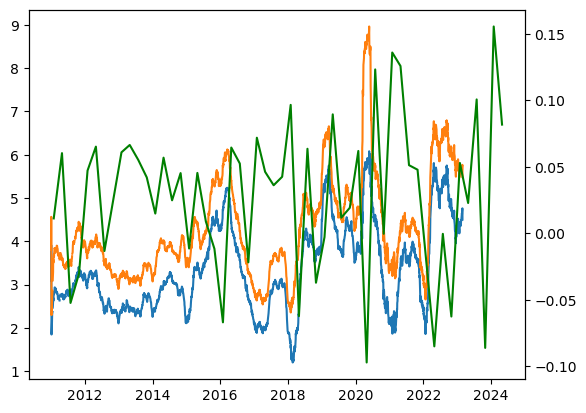

In [1048]:
fig, ax = plt.subplots()
ax.plot(lower)
ax.plot(0.5*three_month_moving_avgU2+0.5*three_month_moving_avgU1)
ax2 = ax.twinx()
ax2.plot(sp500[sp500.index.year>2010].pct_change().resample('3M').agg(lambda x: (x + 1).prod() - 1), color='g')
#plt.plot(0.5*three_month_moving_avgU1+0.5*three_month_moving_avgU2)


In [1029]:



# de-annualize yearly interest rates
def deannualize(annual_rate, periods=365):
    return (1 + annual_rate) ** (1/periods) - 1

def get_risk_free_rate():
    # download 3-month us treasury bills rates
    annualized = yf.download("^IRX")["Adj Close"]

    # de-annualize
    daily = annualized.apply(deannualize)
    rf = pd.DataFrame({"annualized": annualized, "daily": daily})

    # create dataframe
    return rf


In [1030]:
rf = get_risk_free_rate()
rf

[*********************100%%**********************]  1 of 1 completed


,annualized,daily
Date,,
1960-01-04,4.520,0.004691
1960-01-05,4.550,0.004706
1960-01-06,4.680,0.004770
1960-01-07,4.630,0.004746
1960-01-08,4.590,0.004726
...,...,...
2024-03-15,5.238,0.005028
2024-03-18,5.238,0.005028
2024-03-19,5.238,0.005028


In [1031]:
risk_free = rf['annualized']/100

In [1032]:
risk_free

Date
1960-01-04    0.04520
1960-01-05    0.04550
1960-01-06    0.04680
1960-01-07    0.04630
1960-01-08    0.04590
               ...   
2024-03-15    0.05238
2024-03-18    0.05238
2024-03-19    0.05238
2024-03-20    0.05228
2024-03-21    0.05228
Name: annualized, Length: 16067, dtype: float64

In [1033]:
pd.merge(L1, risk_free, left_index=True, right_index=True)

,exdate,cp_flag_x,strike_price_x,best_bid_x,best_offer_x,volume_x,optionid_x,index_flag_x,issuer_x,exercise_style_x,...,optionid,index_flag,issuer,exercise_style,L1,Close,annualized_x,diff,L11,annualized_y
2011-01-03,2011-01-22,P,1125000,0.55,0.65,724,49585967,1,CBOE S&P 500 INDEX,E,...,36111690,1,CBOE S&P 500 INDEX,E,-147.55,1271.869995,0.00120,19,-0.609740,0.00120
2011-01-03,2011-02-19,P,950000,0.10,0.50,100,49586205,1,CBOE S&P 500 INDEX,E,...,36257632,1,CBOE S&P 500 INDEX,E,-320.65,1271.869995,0.00120,47,1.366763,0.00120
2011-01-03,2011-03-19,P,1125000,7.10,8.90,2163,46239430,1,CBOE S&P 500 INDEX,E,...,45671347,1,CBOE S&P 500 INDEX,E,-143.35,1271.869995,0.00120,75,3.797329,0.00120
2011-01-04,2011-03-19,P,1160000,11.10,12.80,1,46989347,1,CBOE S&P 500 INDEX,E,...,46989331,1,CBOE S&P 500 INDEX,E,-105.75,1270.199951,0.00135,74,4.767365,0.00135
2011-01-05,2011-01-22,P,1030000,0.10,0.15,1003,49286637,1,CBOE S&P 500 INDEX,E,...,36274105,1,CBOE S&P 500 INDEX,E,-247.65,1276.560059,0.00135,17,-1.025187,0.00135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28,2023-03-22,P,3725000,12.50,12.80,5,152859340,1,CBOE S&P 500 INDEX,E,...,152859301,1,CBOE S&P 500 INDEX,E,-261.40,3970.149902,0.04710,22,-5.691270,0.04710
2023-02-28,2023-03-23,P,3650000,7.80,8.00,1,152800439,1,CBOE S&P 500 INDEX,E,...,152800371,1,CBOE S&P 500 INDEX,E,-340.50,3970.149902,0.04710,23,-9.534277,0.04710
2023-02-28,2023-03-24,P,3200000,1.05,1.15,2,152365130,1,CBOE S&P 500 INDEX,E,...,152365050,1,CBOE S&P 500 INDEX,E,-786.10,3970.149902,0.04710,24,-6.056096,0.04710
2023-02-28,2023-04-06,P,3800000,35.20,35.80,16,152859626,1,CBOE S&P 500 INDEX,E,...,152859559,1,CBOE S&P 500 INDEX,E,-193.10,3970.149902,0.04710,37,-4.852035,0.04710
